In [1]:
from datasets import LungInfectedDataset
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Import the train, test, and val datasets
train_dataset = LungInfectedDataset('train')
test_dataset = LungInfectedDataset('test')
val_dataset = LungInfectedDataset('val')

In [3]:
train_dataset.describe()

This is the train dataset of the Lung (Normal/Infected) Dataset used in the Small Project for the 50.039 Deep Learning class in Feb-March 2021. 
It contains a total of 5216 images of size 150 by 150.
The images are split into the following classes and they are stored in the following locations:
 - normal (1341 images), in './dataset/train/normal'.
 - infected (3875 images), in ['./dataset/train/infected/non-covid', './dataset/train/infected/covid'].



In [4]:
test_dataset.describe()

This is the test dataset of the Lung (Normal/Infected) Dataset used in the Small Project for the 50.039 Deep Learning class in Feb-March 2021. 
It contains a total of 614 images of size 150 by 150.
The images are split into the following classes and they are stored in the following locations:
 - normal (234 images), in './dataset/test/normal'.
 - infected (380 images), in ['./dataset/test/infected/non-covid', './dataset/test/infected/covid'].



In [5]:
val_dataset.describe()

This is the val dataset of the Lung (Normal/Infected) Dataset used in the Small Project for the 50.039 Deep Learning class in Feb-March 2021. 
It contains a total of 24 images of size 150 by 150.
The images are split into the following classes and they are stored in the following locations:
 - normal (8 images), in './dataset/val/normal'.
 - infected (16 images), in ['./dataset/val/infected/non-covid', './dataset/val/infected/covid'].



In [6]:
# Prepare data
def prepare_data(train_dataset, test_dataset, val_dataset):
    a1 = train_dataset.dataset_numbers['normal']
    a2 = train_dataset.dataset_numbers['infected']
    
    b1 = test_dataset.dataset_numbers['normal']
    b2 = test_dataset.dataset_numbers['infected']
    
    c1 = val_dataset.dataset_numbers['normal']
    c2 = val_dataset.dataset_numbers['infected']
    
    types = {'Normal': np.asarray([a1, b1, c1]),
             'Infected': np.asarray([a2, b2, c2])}
    datasets = {'Train': np.asarray([a1, a2]),
                'Test': np.asarray([b1, b2]),
                'Validation': np.asarray([c1, c2])}
    return types, datasets

types, datasets = prepare_data(train_dataset, test_dataset, val_dataset)
colors = ['green', 'steelblue']

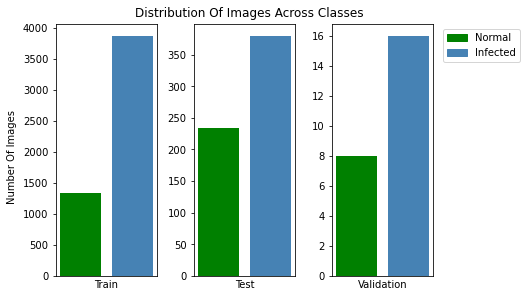

In [7]:
# Plot the distribution of images across classes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(6, 4))

X = np.arange(2)
for i, (label, Y) in enumerate(datasets.items()):
    axes[i].bar(X, Y, color=colors)
    axes[i].set_xlabel(label)
    axes[i].tick_params(which='both', bottom=False, labelbottom=False)

fig.suptitle('Distribution Of Images Across Classes', x=0.55, y=1.02)
fig.text(s='Number Of Images', x=0, y=0.5, ha='center', va='center', rotation='vertical')
fig.tight_layout(w_pad=1)

handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(handles, types, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

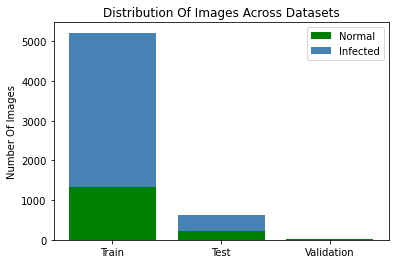

In [8]:
# Plot the distribution of images across datasets
X = list(datasets.keys())

bottom = np.zeros(3)
for i, (label, Y) in enumerate(types.items()):
    plt.bar(X, Y, label=label, color=colors[i], bottom=bottom)
    bottom += Y

plt.title('Distribution Of Images Across Datasets')
plt.ylabel('Number Of Images')
plt.legend()

plt.show()